# Data Loading

[Data catalog](https://www.agenziaentrate.gov.it/portale/Schede/FabbricatiTerreni/omi/Manuali+e+guide/) (in Italian)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from omi.dataloader import ValuesDataLoader

In [2]:
values_dataloader = ValuesDataLoader(year=2022)
values = values_dataloader.load(semester=2)

In [3]:
values.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160801 entries, 0 to 160800
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype   
---  ------                   --------------   -----   
 0   area_territoriale        160801 non-null  category
 1   regione                  160801 non-null  category
 2   provincia                158472 non-null  category
 3   comune_codice_istat      160800 non-null  string  
 4   comune_codice_catastale  160801 non-null  string  
 5   comune_codice_nazionale  160801 non-null  string  
 6   comune_denominazione     160801 non-null  string  
 7   fascia                   160801 non-null  category
 8   zona                     160801 non-null  category
 9   linkzona                 160801 non-null  string  
 10  tipologia_codice         160801 non-null  category
 11  tipologia_descrizione    160801 non-null  string  
 12  condizione               160801 non-null  category
 13  prezzo_min               160790 non-null  fl

In [4]:
pd.DataFrame({
    "unique_values": values.nunique(),
    "missing_values": values.isna().sum(),
    "dtype": values.dtypes
})

,unique_values,missing_values,dtype
area_territoriale,5,0,category
regione,20,0,category
provincia,102,2329,category
comune_codice_istat,7888,1,string[python]
comune_codice_catastale,7890,0,string[python]
comune_codice_nazionale,7890,0,string[python]
comune_denominazione,7885,0,string[python]
fascia,5,0,category
zona,310,0,category
linkzona,24329,0,string[python]


In [5]:
values.describe().T

,count,mean,std,min,25%,50%,75%,max
prezzo_min,160790.0,754.826355,594.230347,0.0,375.0,600.0,950.0,16300.0
prezzo_max,160790.0,1037.991211,827.256104,0.0,520.0,820.0,1300.0,25000.0
affitto_min,145841.0,3.031346,2.196481,0.0,1.6,2.5,3.8,86.0
affitto_max,145841.0,4.257828,3.215710,0.0,2.2,3.5,5.4,147.0


In [6]:
for colname in values.select_dtypes("number").columns:
    print(f"\n----- {colname} -----")
    print(np.log10(values[colname] + 1).round().value_counts())


----- prezzo_min -----
prezzo_min
3.0    131472
2.0     27503
4.0      1255
0.0       559
1.0         1
Name: count, dtype: int64

----- prezzo_max -----
prezzo_max
3.0    146807
2.0      9617
4.0      3807
0.0       559
Name: count, dtype: int64

----- affitto_min -----
affitto_min
1.0    84464
0.0    61351
2.0       26
Name: count, dtype: int64

----- affitto_max -----
affitto_max
1.0    111871
0.0     33812
2.0       158
Name: count, dtype: int64


# Data Exploration

# Univariate

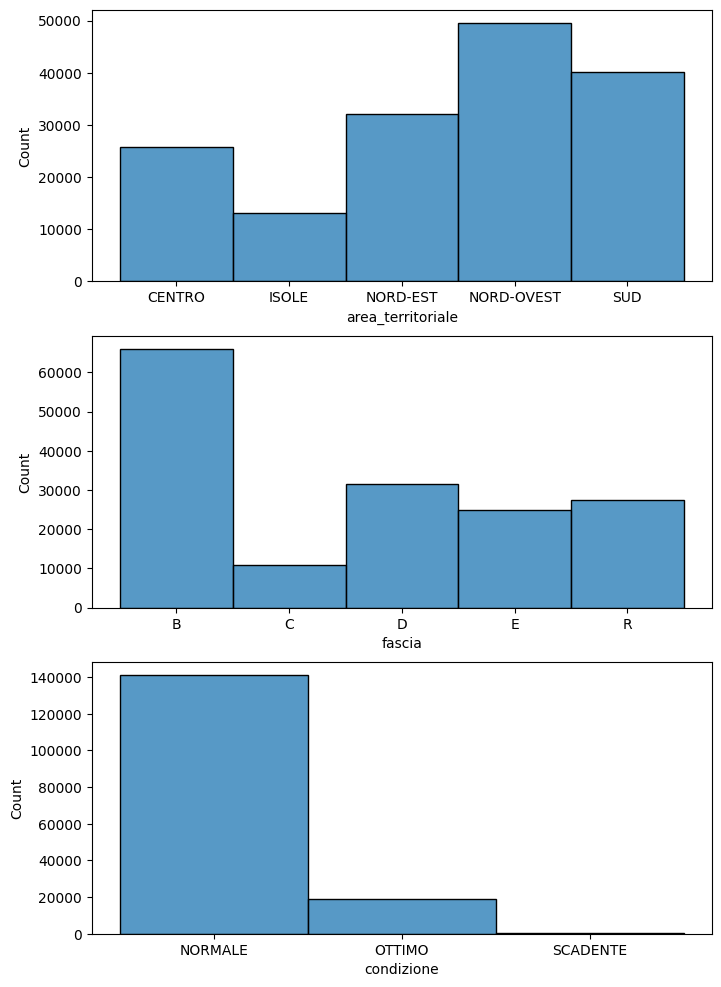

In [7]:
fig, axes = plt.subplots(3, 1, figsize=(8, 12))

for ax, col in enumerate(["area_territoriale", "fascia", "condizione"]):
    sns.histplot(data=values, x=col, ax=axes[ax])

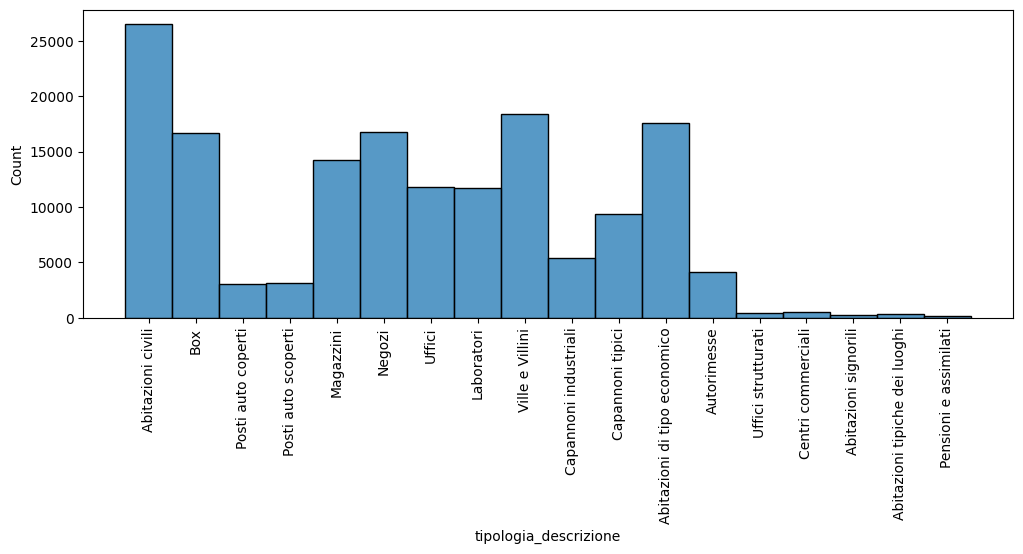

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(12, 4))
_ = plt.xticks(rotation=90)
_ = sns.histplot(data=values, x="tipologia_descrizione", ax=ax)

## Prices vs Region

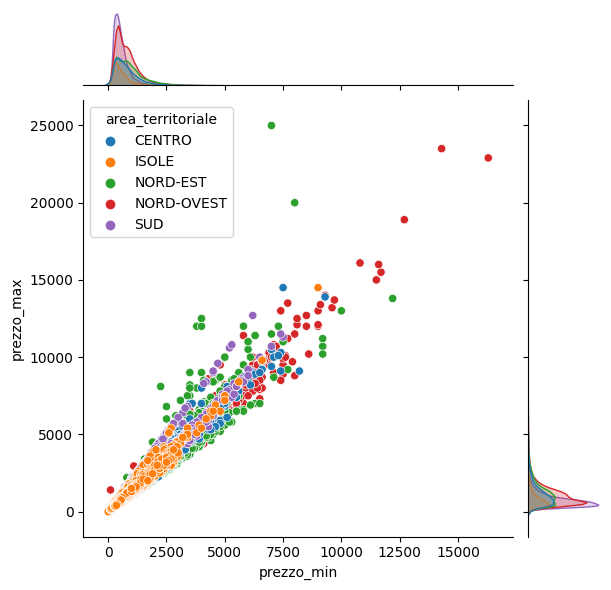

In [9]:
_ = sns.jointplot(data=values, x="prezzo_min", y="prezzo_max", hue="area_territoriale")

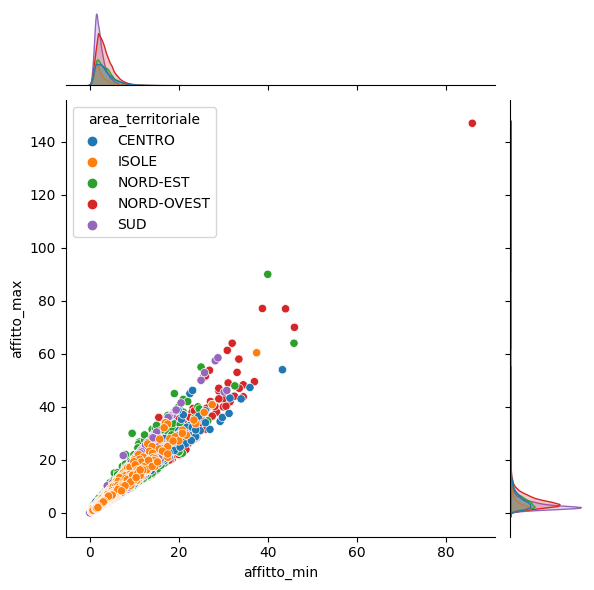

In [10]:
_ = sns.jointplot(data=values, x="affitto_min", y="affitto_max", hue="area_territoriale")

In [11]:
transformed = values.assign(
    prezzo_min = lambda df: np.log10(df["prezzo_min"] + 1),
    prezzo_max = lambda df: np.log10(df["prezzo_max"] + 1),
    affitto_min = lambda df: np.log10(df["affitto_min"] + 1),
    affitto_max = lambda df: np.log10(df["affitto_max"] + 1),
)

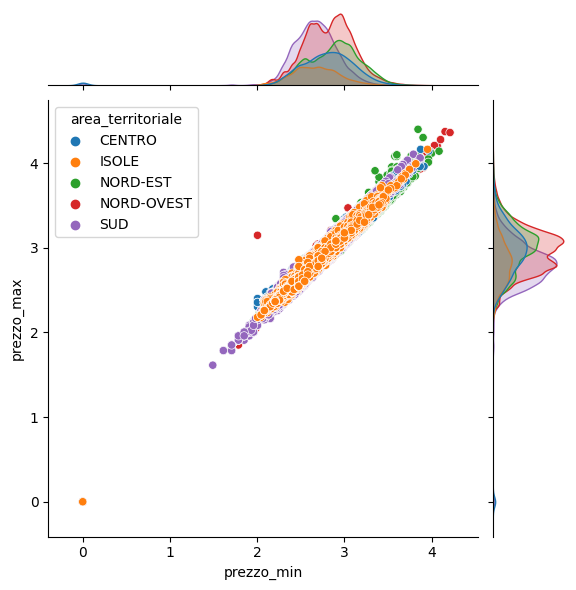

In [12]:
_ = sns.jointplot(data=transformed, x="prezzo_min", y="prezzo_max", hue="area_territoriale")

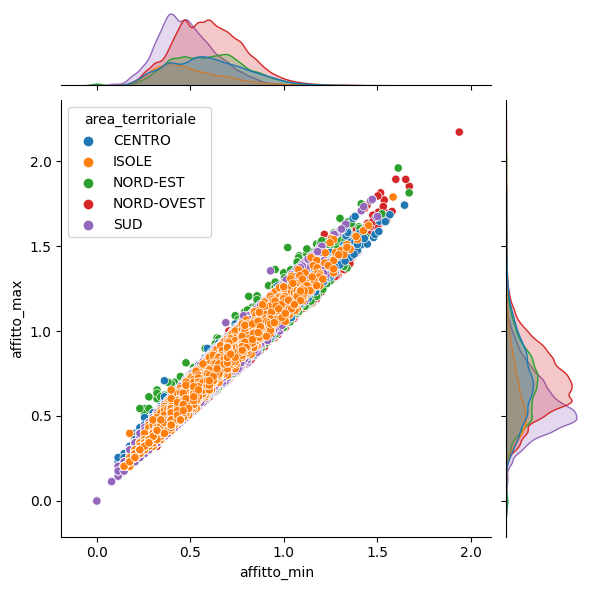

In [13]:
_ = sns.jointplot(data=transformed, x="affitto_min", y="affitto_max", hue="area_territoriale")

## Prices vs Area (suburbs, centre...)

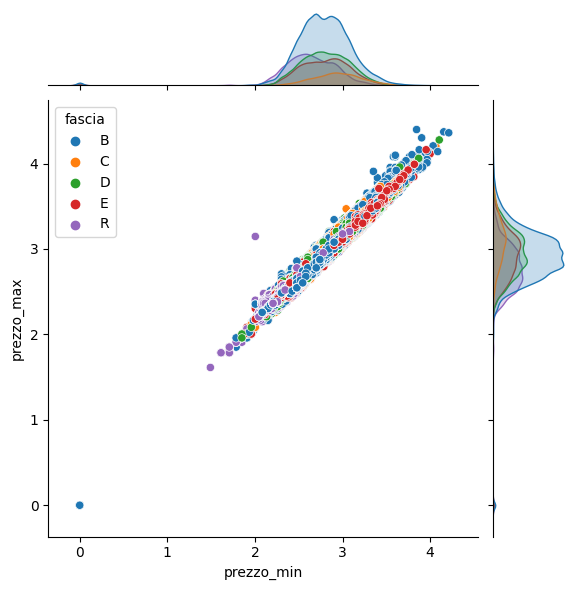

In [14]:
_ = sns.jointplot(data=transformed, x="prezzo_min", y="prezzo_max", hue="fascia")

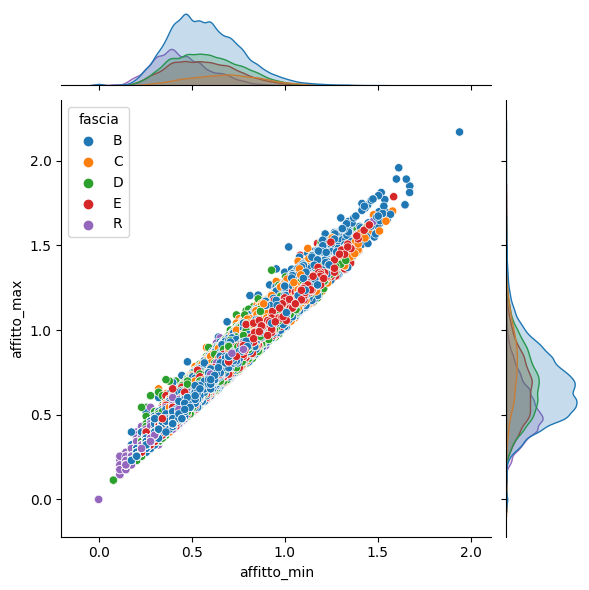

In [15]:
_ = sns.jointplot(data=transformed, x="affitto_min", y="affitto_max", hue="fascia")

## Prices vs Condition

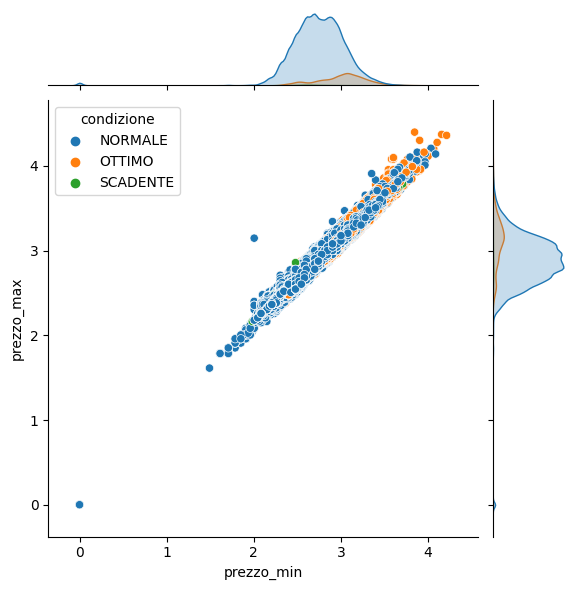

In [16]:
_ = sns.jointplot(data=transformed, x="prezzo_min", y="prezzo_max", hue="condizione")

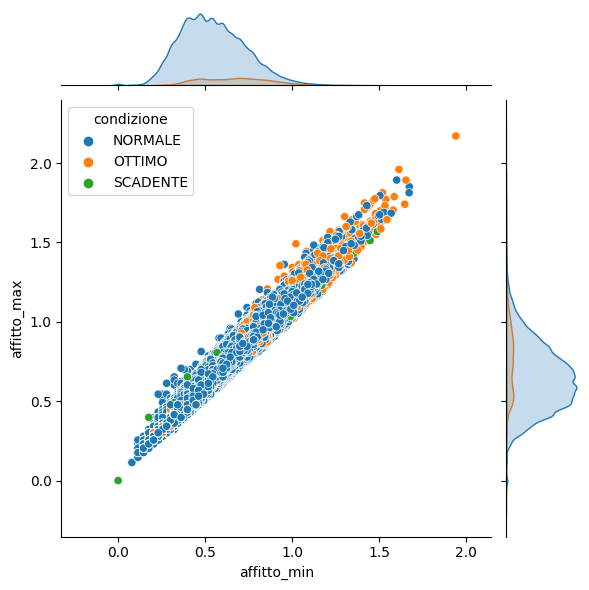

In [17]:
_ = sns.jointplot(data=transformed, x="affitto_min", y="affitto_max", hue="condizione")